In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

# Exploring and Processing the Data

The details of the dataset are as follows:

Images to be recognized: Tiny images of 224* 224 pixels

Labels: 2 possible labels 

Dataset size:  images, split into 1649 for training and 500 for testing

In [2]:
train_dir="/kaggle/input/signature-verification-dataset/sign_data/train/"
test_dir="/kaggle/input/signature-verification-dataset/sign_data/test/"


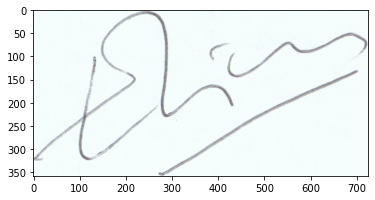

In [3]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\admin\train\001\001_01.PNG")
plt.imshow(img)


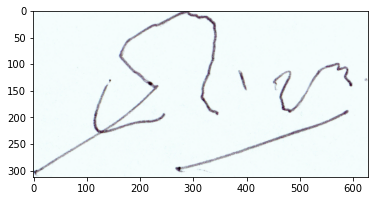

In [4]:
img1 = plt.imread(r"C:\Users\admin\train\001_forg\0119001_01.png")
plt.imshow(img1)

In [5]:
SIZE = 224

In [6]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir(r"C:\Users\admin\train"):
    for data in glob.glob(r'C:\\Users\\admin\\train\\' +per+'\\*.*'):
        
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []
                          

for per in os.listdir(r"C:\\Users\\admin\\test\\"):
    for data in glob.glob(r"C:\\Users\\admin\\test\\"+per+'\*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)                                        

In [7]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [8]:
train_data.shape

(1649, 1, 224, 224, 3)

In [9]:
test_data.shape

(500, 1, 224, 224, 3)

In [10]:
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [11]:
train_data.shape

(1649, 224, 224, 3)

In [12]:
train_labels.shape

(1649, 2)

In [13]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [14]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir(r"C:\Users\admin\train"):
    for data in glob.glob(r'C:\\Users\\admin\\train\\' +per+'\\*.*'):
        
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))
train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir(r"C:\\Users\\admin\\test\\"):
    for data in glob.glob(r"C:\\Users\\admin\\test\\"+per+'\*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [15]:
with open('./train_data.pkl', 'wb') as fp:
    pickle.dump(train_data, fp)

with open('./test_data.pkl', 'wb') as fp:
    pickle.dump(test_data, fp)

In [18]:
# Categorical labels
print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

[0 0 0 ... 1 1 1]


In [16]:
input_ = (224,224,3)
EPOCHS = 10 
BS = 64
output_ = 2 

# Building and Training our Convolutional Neural Network

# Inception-v3 – Adam

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
____________________________________________

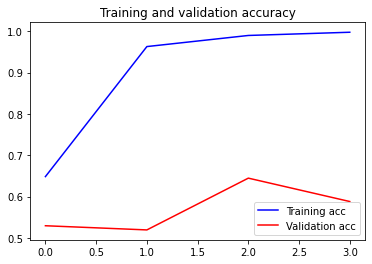

<Figure size 432x288 with 0 Axes>

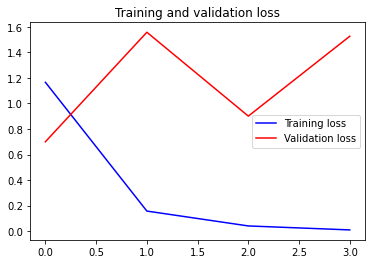

In [18]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Adam_train', intermediate_output_train)
np.save('./InceptionV3_Adam_test', intermediate_output_test)

# Inception-v3 – Adam

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
____________________________________________

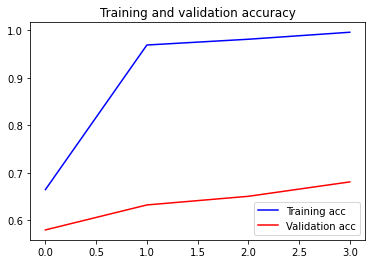

<Figure size 432x288 with 0 Axes>

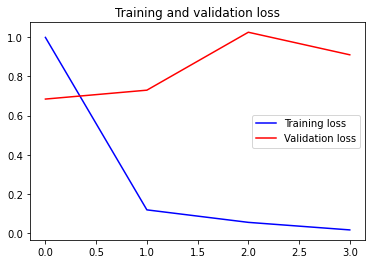

In [21]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Adam_train', intermediate_output_train)
np.save('./InceptionV3_Adam_test', intermediate_output_test)

# Testing out with your own images

In [22]:
my_image = plt.imread("01_0125050.PNG")

In [23]:
 #resize the image of so that we can fit it into our model (input size of  224 *  224 * 3)

In [24]:
from skimage.transform import resize
my_image_resized = resize(my_image, (224,224,3))

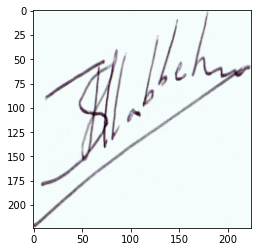

In [25]:
img = plt.imshow(my_image_resized)

In [26]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [27]:
number_to_class = [ 'Geniune','forg']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])


Most likely class: forg -- Probability: 0.40743548
Second most likely class: Geniune -- Probability: 0.5925645


In [28]:
my_image2 = plt.imread("02_050.png")

In [29]:
from skimage.transform import resize
my_image_resized = resize(my_image2, (224,224,3))

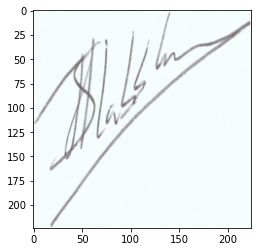

In [30]:
img = plt.imshow(my_image_resized)

In [31]:
probabilities = model.predict(np.array( [my_image_resized,] ))

In [32]:
number_to_class = [ 'Geniune' ,'forg' ]
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])
print("Second most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])


Most likely class: forg -- Probability: 0.0064931894
Second most likely class: Geniune -- Probability: 0.9935068


In [33]:
pred = model.predict(test_data)
pred  #prob of genuine, prob of forged
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.682

In [34]:
pred

array([[4.82470691e-01, 5.17529249e-01],
       [9.98353481e-01, 1.64658029e-03],
       [9.73004103e-01, 2.69959215e-02],
       [9.99887586e-01, 1.12384136e-04],
       [9.99041975e-01, 9.57995071e-04],
       [1.60608158e-01, 8.39391887e-01],
       [3.56491685e-01, 6.43508315e-01],
       [2.94092298e-01, 7.05907762e-01],
       [1.31931767e-01, 8.68068278e-01],
       [8.11829343e-02, 9.18817103e-01],
       [7.56945491e-01, 2.43054479e-01],
       [6.49517000e-01, 3.50482970e-01],
       [4.69610617e-02, 9.53038990e-01],
       [5.81440866e-01, 4.18559074e-01],
       [5.85756451e-02, 9.41424370e-01],
       [5.28362289e-04, 9.99471605e-01],
       [9.24584866e-01, 7.54150599e-02],
       [9.47574198e-01, 5.24258353e-02],
       [8.27527940e-02, 9.17247176e-01],
       [9.79208410e-01, 2.07916293e-02],
       [9.87823248e-01, 1.21766953e-02],
       [5.05007021e-02, 9.49499309e-01],
       [9.54075873e-01, 4.59241644e-02],
       [2.89180189e-01, 7.10819840e-01],
       [9.956992